# Analisis Perbandingan Kinerja Metode iterative dan rekursif dalam system perhitungan aplikasi konversi

# Business Understanding(Topik)

**Konversi berat paket untuk perhitungan ongkos**

Misalnya, perusahaan pengiriman (seperti JNE) memiliki tarif berdasarkan berat barang. Untuk menghitung biaya pengiriman, pertama kita perlu mengonversi satuan berat (misalnya gram ke kilogram), lalu berdasarkan berat tersebut, kita dapat menghitung tarif ongkir.

# Case Understanding (Soal)

Pembuatan algoritma iteratif dan rekursif untuk topik yang telah dipilih. Lakukan analisis kompleksitas waktu, running time, menentukan kelas kompleksitas waktu, menggambarkan grafik, dan menentukan kelas kompleksitas masing-masing algoritma.

Misalkan :
1. Rp10.000 per kg berat barang
2. Rp500 per cm dimensi
3. Rp5.000 per kg berat volumetrik


# Data Preprocessing

In [ ]:
import pandas as pd
from openpyxl import Workbook
df = pd.read_excel('/content/JNE_dummy_dataset.xlsx')
df

,ID Pengiriman,Asal,Tujuan,Berat Barang (kg),Dimensi Barang (cm),Layanan,Berat Volumetrik (kg),Tarif Pengiriman (IDR)
0,JNE001,Yogyakarta,Makassar,0.7,19x30x33,REG,3.1,31000.0
1,JNE002,Bali,Bandung,2.9,12x20x47,OKE,1.9,14500.0
2,JNE003,Bali,Jakarta,1.7,17x29x28,REG,2.3,23000.0
3,JNE004,Semarang,Balikpapan,8.8,35x46x35,YES,9.4,141000.0
4,JNE005,Medan,Bali,5.3,46x19x34,OKE,5.0,26500.0
...,...,...,...,...,...,...,...,...
95,JNE096,Bali,Makassar,10.0,32x38x39,OKE,7.9,50000.0
96,JNE097,Bali,Medan,1.0,10x15x38,REG,0.9,10000.0
97,JNE098,Yogyakarta,Bali,5.8,20x46x28,REG,4.3,58000.0
98,JNE099,Jakarta,Yogyakarta,9.7,50x18x43,YES,6.5,145500.0


In [ ]:
df.drop('Tarif Pengiriman (IDR)', inplace=True, axis=1)
df

,ID Pengiriman,Asal,Tujuan,Berat Barang (kg),Dimensi Barang (cm),Layanan,Berat Volumetrik (kg)
0,JNE001,Yogyakarta,Makassar,0.7,19x30x33,REG,3.1
1,JNE002,Bali,Bandung,2.9,12x20x47,OKE,1.9
2,JNE003,Bali,Jakarta,1.7,17x29x28,REG,2.3
3,JNE004,Semarang,Balikpapan,8.8,35x46x35,YES,9.4
4,JNE005,Medan,Bali,5.3,46x19x34,OKE,5.0
...,...,...,...,...,...,...,...
95,JNE096,Bali,Makassar,10.0,32x38x39,OKE,7.9
96,JNE097,Bali,Medan,1.0,10x15x38,REG,0.9
97,JNE098,Yogyakarta,Bali,5.8,20x46x28,REG,4.3
98,JNE099,Jakarta,Yogyakarta,9.7,50x18x43,YES,6.5


In [ ]:
#df.to_csv('dataset tanpa tarif.csv')

# Iteratif

In [ ]:
def calculate_shipping_cost_iterative(df):
    # Harga per unit
    price_per_kg_weight = 10000  # Rp per kg berat barang
    price_per_cm_dimension = 500  # Rp per cm dimensi
    price_per_kg_volumetric = 5000  # Rp per kg berat volumetrik

    results = []
    for entry in df:
        berat_barang = entry['Berat Barang (kg)']
        panjang, lebar, tinggi = entry['Dimensi Barang (cm)']
        berat_volumetrik = entry['Berat Volumetrik (kg)']

        # Menghitung biaya berdasarkan berat barang, dimensi, dan berat volumetrik
        cost_weight = berat_barang * price_per_kg_weight
        cost_dimension = (panjang + lebar + tinggi) * price_per_cm_dimension
        cost_volumetric = berat_volumetrik * price_per_kg_volumetric

        # Total biaya pengiriman
        total_cost = cost_weight + cost_dimension + cost_volumetric
        results.append({
            'ID Pengiriman': entry['ID Pengiriman'],
            'Total Cost (IDR)': total_cost
        })
    return results

def get_user_input():
    id_pengiriman = input("Masukkan ID Pengiriman: ")
    berat_barang = float(input("Masukkan Berat Barang (kg): "))
    panjang = int(input("Masukkan Panjang Barang (cm): "))
    lebar = int(input("Masukkan Lebar Barang (cm): "))
    tinggi = int(input("Masukkan Tinggi Barang (cm): "))
    berat_volumetrik = float(input("Masukkan Berat Volumetrik (kg): "))

    return {
        'ID Pengiriman': id_pengiriman,
        'Berat Barang (kg)': berat_barang,
        'Dimensi Barang (cm)': (panjang, lebar, tinggi),
        'Berat Volumetrik (kg)': berat_volumetrik
    }

def main():
    data = []
    while True:
        print("\n--- Sistem Penghitungan Tarif Pengiriman ---")
        user_choice = input("Ingin memasukkan data pengiriman? (y/n): ")
        if user_choice.lower() == 'y' or  user_choice == 'Y':
            entry = get_user_input()
            data.append(entry)
        elif user_choice.lower() == 'n'or user_choice == 'N':
            break
        else:
            print("Pilihan tidak valid, silakan pilih 'y' atau 'n'.")


    # Menampilkan hasil menggunakan metode iteratif
    result_iterative = calculate_shipping_cost_iterative(data)
    print("\n--- Hasil Perhitungan (Iteratif) ---")
    for result in result_iterative:
        print(f"ID Pengiriman: {result['ID Pengiriman']}, Total Cost (IDR): {result['Total Cost (IDR)']}")

if __name__ == "__main__":
    main()



--- Sistem Penghitungan Tarif Pengiriman ---
Ingin memasukkan data pengiriman? (y/n): Y
Masukkan ID Pengiriman: 234
Masukkan Berat Barang (kg): 76
Masukkan Panjang Barang (cm): 12
Masukkan Lebar Barang (cm): 12
Masukkan Tinggi Barang (cm): 12
Masukkan Berat Volumetrik (kg): 12

--- Sistem Penghitungan Tarif Pengiriman ---
Ingin memasukkan data pengiriman? (y/n): N

--- Hasil Perhitungan (Iteratif) ---
ID Pengiriman: 234, Total Cost (IDR): 838000.0


# Rekursif

In [ ]:
def calculate_shipping_cost_recursive(df, index=0, results=None):
    if results is None:
        results = []

    # Basis rekursi: Jika semua data sudah diproses, kembalikan hasil
    if index >= len(df):
        return results

    # Harga per unit
    price_per_kg_weight = 10000  # Rp per kg berat barang
    price_per_cm_dimension = 500  # Rp per cm dimensi
    price_per_kg_volumetric = 5000  # Rp per kg berat volumetrik

    # Data saat ini
    entry = df[index]
    berat_barang = entry['Berat Barang (kg)']
    panjang, lebar, tinggi = entry['Dimensi Barang (cm)']
    berat_volumetrik = entry['Berat Volumetrik (kg)']

    # Menghitung biaya berdasarkan berat barang, dimensi, dan berat volumetrik
    cost_weight = berat_barang * price_per_kg_weight
    cost_dimension = (panjang + lebar + tinggi) * price_per_cm_dimension
    cost_volumetric = berat_volumetrik * price_per_kg_volumetric

    # Total biaya pengiriman
    total_cost = cost_weight + cost_dimension + cost_volumetric
    results.append({
        'ID Pengiriman': entry['ID Pengiriman'],
        'Total Cost (IDR)': total_cost
    })

    # Panggil rekursif untuk elemen berikutnya
    return calculate_shipping_cost_recursive(df, index + 1, results)

def get_user_input():
    id_pengiriman = input("Masukkan ID Pengiriman: ")
    berat_barang = float(input("Masukkan Berat Barang (kg): "))
    panjang = int(input("Masukkan Panjang Barang (cm): "))
    lebar = int(input("Masukkan Lebar Barang (cm): "))
    tinggi = int(input("Masukkan Tinggi Barang (cm): "))
    berat_volumetrik = float(input("Masukkan Berat Volumetrik (kg): "))

    return {
        'ID Pengiriman': id_pengiriman,
        'Berat Barang (kg)': berat_barang,
        'Dimensi Barang (cm)': (panjang, lebar, tinggi),
        'Berat Volumetrik (kg)': berat_volumetrik
    }

def main():
    data = []
    while True:
        print("\n--- Sistem Penghitungan Tarif Pengiriman ---")
        user_choice = input("Ingin memasukkan data pengiriman? (y/n): ")
        if user_choice.lower() == 'y' or user_choice == 'Y':
            entry = get_user_input()
            data.append(entry)
        elif user_choice.lower() == 'n' or user_choice == 'N':
            break
        else:
            print("Pilihan tidak valid, silakan pilih 'y' atau 'n'.")

    # Menampilkan hasil menggunakan metode rekursif
    result_recursive = calculate_shipping_cost_recursive(data)
    print("\n--- Hasil Perhitungan (Rekursif) ---")
    for result in result_recursive:
        print(f"ID Pengiriman: {result['ID Pengiriman']}, Total Cost (IDR): {result['Total Cost (IDR)']}")

if __name__ == "__main__":
    main()


--- Sistem Penghitungan Tarif Pengiriman ---
Ingin memasukkan data pengiriman? (y/n): Y
Masukkan ID Pengiriman: JNEWS1
Masukkan Berat Barang (kg): 1
Masukkan Panjang Barang (cm): 2
Masukkan Lebar Barang (cm): 1
Masukkan Tinggi Barang (cm): 2
Masukkan Berat Volumetrik (kg): 1

--- Sistem Penghitungan Tarif Pengiriman ---
Ingin memasukkan data pengiriman? (y/n): N

--- Hasil Perhitungan (Rekursif) ---
ID Pengiriman: JNEWS1, Total Cost (IDR): 17500.0


# Penentuan Kelas Kompleksitas

## Iteratif

Iteratif -> O(n)

## Rekursif

Rekursif -> O(n)

# Running Time (Waktu Eksekusi)

## Iteratif

In [ ]:
import time

def total_tarif_iteratif(berat_gram, tarif_dasar=10000):
    # Inisialisasi total ongkos
    total = 0

    # Hitung jumlah 1000 gram dalam berat
    while berat_gram > 0:
        total += tarif_dasar
        berat_gram -= 1000  # Kurangi berat 1000 gram

    return total

def waktu_eksekusi_iteratif(func, berat_gram):
    start_time = time.time()  # Mulai waktu
    func(berat_gram)  # Panggil fungsi
    end_time = time.time()  # Waktu selesai
    return end_time - start_time  # Mengembalikan waktu yang dibutuhkan

# Ukur running time untuk berbagai berat barang
berat_iteratif = [i * 1000 for i in range(1, 21)]  # Berat barang dari 1000 hingga 20000 gram

# Mengukur waktu eksekusi untuk fungsi iteratif
iterative_times = [waktu_eksekusi_iteratif(total_tarif_iteratif, b) for b in berat]

# Menampilkan hasil
for b, waktu in zip(berat, iterative_times):
    print(f"Waktu eksekusi untuk {b} gram (iteratif): {waktu:.10f} detik")

Waktu eksekusi untuk 1000 gram (iteratif): 0.0000011921 detik
Waktu eksekusi untuk 2000 gram (iteratif): 0.0000007153 detik
Waktu eksekusi untuk 3000 gram (iteratif): 0.0000007153 detik
Waktu eksekusi untuk 4000 gram (iteratif): 0.0000004768 detik
Waktu eksekusi untuk 5000 gram (iteratif): 0.0000009537 detik
Waktu eksekusi untuk 6000 gram (iteratif): 0.0000007153 detik
Waktu eksekusi untuk 7000 gram (iteratif): 0.0000009537 detik
Waktu eksekusi untuk 8000 gram (iteratif): 0.0000011921 detik
Waktu eksekusi untuk 9000 gram (iteratif): 0.0000011921 detik
Waktu eksekusi untuk 10000 gram (iteratif): 0.0000011921 detik
Waktu eksekusi untuk 11000 gram (iteratif): 0.0000016689 detik
Waktu eksekusi untuk 12000 gram (iteratif): 0.0000014305 detik
Waktu eksekusi untuk 13000 gram (iteratif): 0.0000011921 detik
Waktu eksekusi untuk 14000 gram (iteratif): 0.0000016689 detik
Waktu eksekusi untuk 15000 gram (iteratif): 0.0000014305 detik
Waktu eksekusi untuk 16000 gram (iteratif): 0.0000019073 detik
W

## Rekursif

In [ ]:
import time
def waktu_eksekusi(func, berat_gram):
    start_time = time.time()  # Mulai waktu
    func(berat_gram)  # Panggil fungsi
    end_time = time.time()  # Waktu selesai
    return end_time - start_time  # Mengembalikan waktu yang dibutuhkan

# Ukur running time untuk berbagai berat barang
berat = [i * 1000 for i in range(1, 21)]  # Berat barang dari 1000 hingga 20000 gram
# iterative_times = [waktu_eksekusi(calculate_shipping_iterative, w) for b in berat]
waktu_rekursif = [waktu_eksekusi(total_tarif, b) for b in berat]

In [ ]:
waktu_rekursif

[1.6689300537109375e-06,
 1.430511474609375e-06,
 1.1920928955078125e-06,
 1.6689300537109375e-06,
 1.9073486328125e-06,
 2.1457672119140625e-06,
 2.86102294921875e-06,
 2.384185791015625e-06,
 1.5974044799804688e-05,
 2.86102294921875e-06,
 3.0994415283203125e-06,
 3.337860107421875e-06,
 3.5762786865234375e-06,
 3.814697265625e-06,
 4.0531158447265625e-06,
 5.245208740234375e-06,
 4.5299530029296875e-06,
 4.0531158447265625e-06,
 5.0067901611328125e-06,
 7.3909759521484375e-06]

Analisis :
1. Perhitungan tersebut berdasarkan mikrodetik. Meskip memiliki selisih yang sedikit, namun bisa diambil kesimpulan.
2. Untuk 1. kemungkinan ongkos untuk berat < 1000 gram(1 kg), karena komputasinya yang cepat. Sedangkan untuk 2. 3. dst kemungkinan ongkos untuk berat > 1000 gram(1 kg), karena komputasi waktunya lebih lambat, meskipun hanya selisih sekian mikrodetik, namun dapat terlihat jelas perbedaan waktu eksekusinya.

# Visualisasi Perbandingan Plot

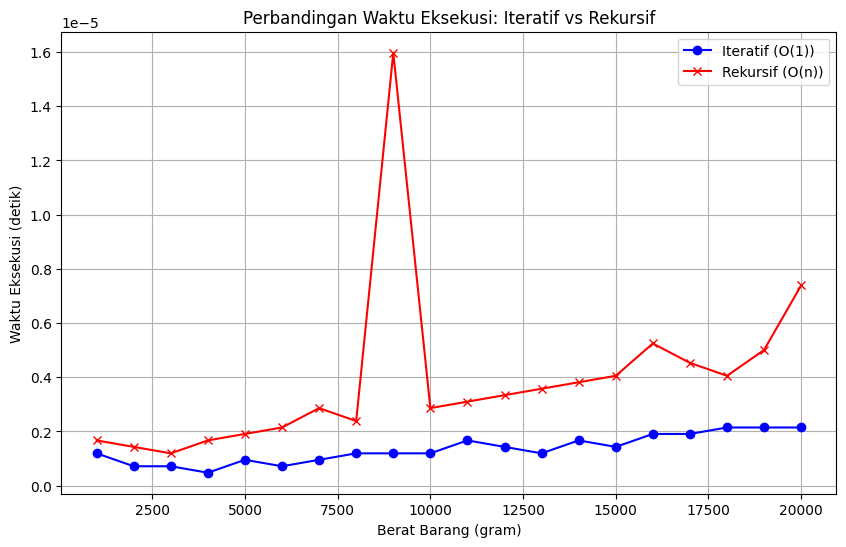

In [ ]:
import matplotlib.pyplot as plt
# Plot grafik
plt.figure(figsize=(10, 6))
plt.plot(berat_iteratif, iterative_times, label="Iteratif (O(1))", color='blue', marker='o')
plt.plot(berat, waktu_rekursif, label="Rekursif (O(n))", color='red', marker='x')
plt.xlabel('Berat Barang (gram)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi: Iteratif vs Rekursif')
plt.legend()
plt.grid(True)
plt.show()

# Kesimpulan


Running Time suatu algoritma dipengaruhi oleh jumlah input, ukuran input, dan ukuran dimensi. Semakin besar ketiga aspek tersebut menyebabkan running time semakin besar. Berdasarkan pengujian yang telah dilakukan, running time rekursif lebih besar daripada iteratif karena rekursif memiliki potensi mengalami stack overflow.  Potensi tersebut menyebabkan running time lebih lama sehingga iteratif lebih efisien dibandingkan rekursif.